<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Romanowski/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Overall Entropy: 1.584962500721156
Information Gain at 0.5: 0.8643375621847642
Information Gain at 0.38: 0.6195148513196114
Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0


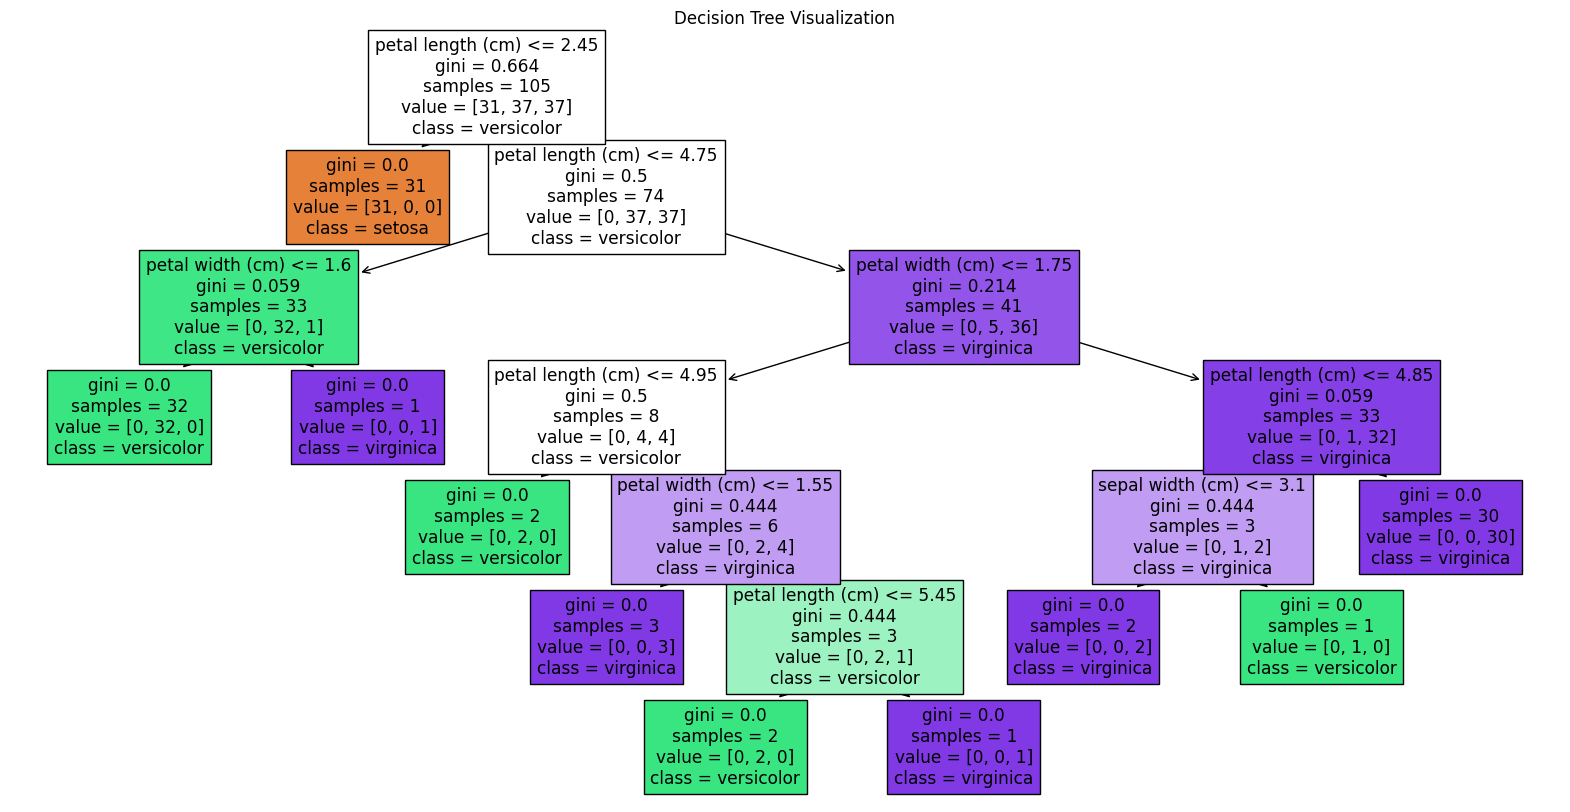

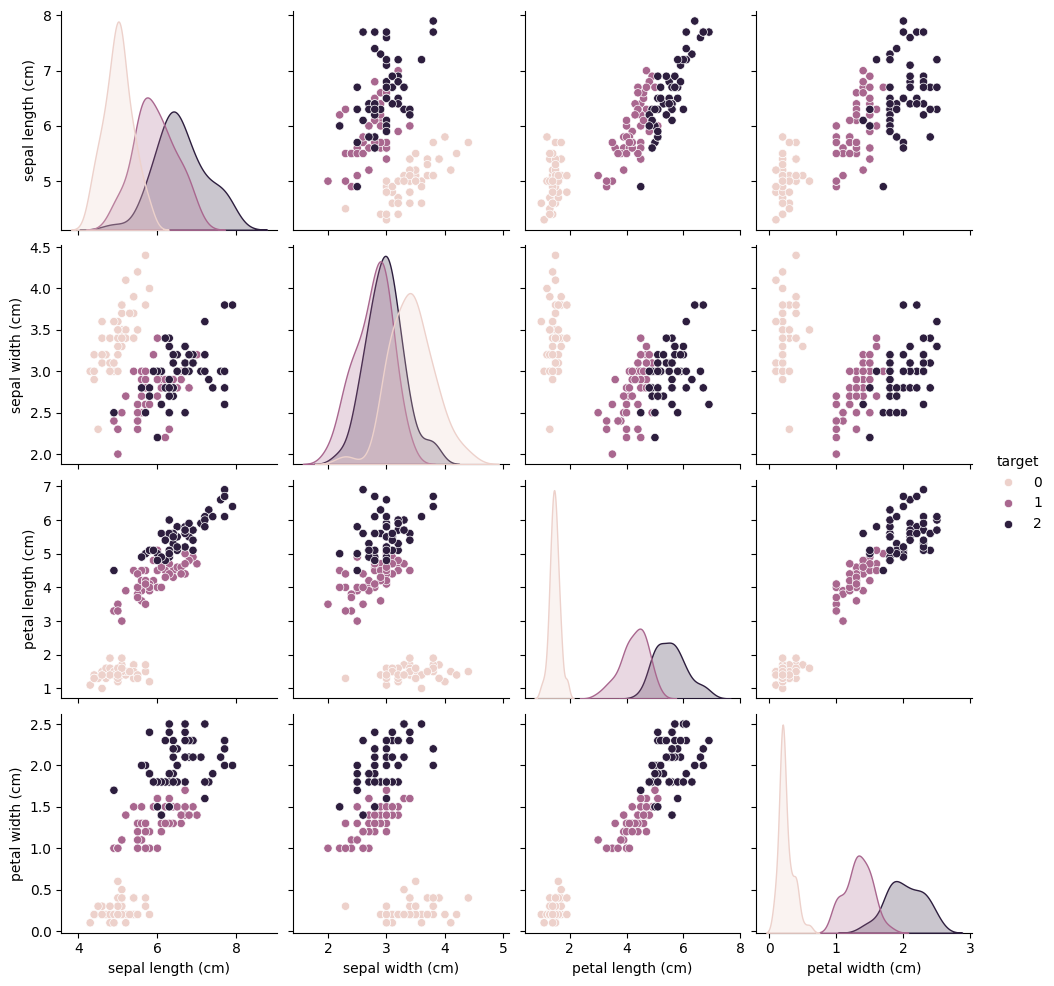

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import entropy

# Load data
iris = datasets.load_iris()
iris_data = iris['data']
iris_target = iris['target']

# Data Preparation for visualization
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
df['target'] = df['target'].astype(int)  # ensure target is integer for plotting

# Function to calculate entropy
def calculate_entropy(labels):
    labels = labels.astype(int)  # ensure labels are integers
    label_counts = np.bincount(labels)
    probabilities = label_counts / np.sum(label_counts)
    return entropy(probabilities, base=2)

# Function to split data
def split_data(data, feature_index, threshold):
    feature_values = data[:, feature_index]
    left_split = data[feature_values <= threshold]
    right_split = data[feature_values > threshold]
    return left_split, right_split

# Function to calculate information gain
def information_gain(data, feature_index, threshold):
    # Total entropy before split
    initial_entropy = calculate_entropy(data[:, -1])

    # Splits
    left_split, right_split = split_data(data, feature_index, threshold)
    left_labels = left_split[:, -1]
    right_labels = right_split[:, -1]

    # Weighted entropy after split
    left_entropy = calculate_entropy(left_labels)
    right_entropy = calculate_entropy(right_labels)
    weighted_entropy = (len(left_labels) / len(data) * left_entropy +
                        len(right_labels) / len(data) * right_entropy)

    # Information gain
    return initial_entropy - weighted_entropy

# Calculate overall entropy before any splits
overall_entropy = calculate_entropy(iris_target)

# Indices
feature_index_pw = iris['feature_names'].index('petal width (cm)')  # index for petal width

# Information gain calculations
ig_0_5 = information_gain(np.c_[iris_data, iris_target], feature_index_pw, 0.5)
ig_0_38 = information_gain(np.c_[iris_data, iris_target], feature_index_pw, 0.38)

# Training classifiers
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_target, test_size=0.3, random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(n_estimators=15, random_state=42)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Print results
print("Overall Entropy:", overall_entropy)
print("Information Gain at 0.5:", ig_0_5)
print("Information Gain at 0.38:", ig_0_38)
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(decision_tree, filled=True, feature_names=iris['feature_names'], class_names=iris['target_names'])
plt.title('Decision Tree Visualization')
plt.show()

# Predictions and accuracy
dt_predictions = decision_tree.predict(X_test)
rf_predictions = random_forest.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Visualize the data
sns.pairplot(df, hue="target")
plt.show()
